## Project Title: "Digging Insights Out of Potholes" 
### Team Members: Lidio Meireles, Anthony Stansall, Tian Luo, & James Carter

In [1]:
# Project Title
# Digging Insights Out of Potholes

# Team Members
# Lidio Meireles, James Carter, Anthony Stansall, Tian Luo

# Project Description
# The City of San Diego shares a public dataset of pothole repair requests made between
# 01/2017 and 02/2019 Each record includes the date the pothole was reported, the date 
# the pothole was repaired, the location of the pothole (lat & long), among other things. 
# From this dataset, we plan to answer the following questions:

# Research Questions

# 1) How long does it take to repair a pothole? Repair time by neighborhood?
# 2) Most affected neighborhoods?
# 3) Number of pothole repair requests over time. How rain affects the number of potholes?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes as ax

In [3]:
file = "../data/20190228_get_it_done_pothole_requests_datasd.csv"
df = pd.read_csv(file)
df.head(5)
del df['referred_department']
del df['service_name']
del df['case_record_type']
del df['public_description']

,service_request_id,requested_datetime,case_age_days,service_name,case_record_type,updated_datetime,status,lat,long,district,case_origin,referred_department,public_description
0,80508,2016-05-20T08:55:00,0.0,Pothole,TSW,2016-05-20T16:42:00,Closed,32.831881,-117.231233,2.0,Phone,NaN,"test only, please dont create a notification"
1,80510,2016-05-20T09:05:00,0.0,Pothole,TSW,2016-05-20T16:42:00,Closed,32.716021,-117.159052,3.0,Web,NaN,Test Only - Please close
2,80518,2016-05-20T09:31:00,19.0,Pothole,TSW,2016-06-07T21:39:00,Closed,32.760286,-117.104798,9.0,Phone,NaN,4000 block of copeland just before you get on ...
3,80531,2016-05-20T10:43:00,5.0,Pothole,TSW,2016-05-25T22:37:00,Closed,32.955916,-117.252152,1.0,Phone,NaN,LARGE P/H CAUSED VEHICLE DAMAGE
4,80535,2016-05-20T11:14:00,0.0,Pothole,TSW,2016-05-20T13:36:00,Closed,32.710295,-117.155278,3.0,Web,NaN,This is a test. Please close when you receive.


In [4]:
df.to_csv("../data/output.csv")

In [5]:
pothole_df = df

# Drop duplicate service requests based on status, and lat, long
print(len(pothole_df))
pothole_df.drop_duplicates(['lat','long','district','case_origin'],inplace=True)
print(len(pothole_df))

48305
44581


In [6]:
pothole_df.head(5)

,service_request_id,requested_datetime,case_age_days,updated_datetime,status,lat,long,district,case_origin
0,80508,2016-05-20T08:55:00,0.0,2016-05-20T16:42:00,Closed,32.831881,-117.231233,2.0,Phone
1,80510,2016-05-20T09:05:00,0.0,2016-05-20T16:42:00,Closed,32.716021,-117.159052,3.0,Web
2,80518,2016-05-20T09:31:00,19.0,2016-06-07T21:39:00,Closed,32.760286,-117.104798,9.0,Phone
3,80531,2016-05-20T10:43:00,5.0,2016-05-25T22:37:00,Closed,32.955916,-117.252152,1.0,Phone
4,80535,2016-05-20T11:14:00,0.0,2016-05-20T13:36:00,Closed,32.710295,-117.155278,3.0,Web


### Age of Case by Month

In [7]:
# Age of Case = AOC [MEDIAN] for individual cases
# get substring YYYY-MM
pothole_reports_age = pd.DataFrame(pothole_df.groupby('requested_datetime')['case_age_days'].mean())
# pothole_reports_AOC = pothole_reports_AOC.loc['2017-02':'2019-02']
pothole_reports_age.rename(columns={'case_age_days':'Age of Case'}, inplace=True)
pothole_reports_age.head(5)
pothole_reports_age.reset_index(inplace=True)

,Age of Case
requested_datetime,
2016-05-20T08:55:00,0.0
2016-05-20T09:05:00,0.0
2016-05-20T09:31:00,19.0
2016-05-20T10:43:00,5.0
2016-05-20T11:14:00,0.0


In [8]:
# Age of Case = AOC [MEDIAN] grouped-by month
# get substring YYYY-MM
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports_AOC = pd.DataFrame(pothole_df.groupby('Month')['case_age_days'].median())
pothole_reports_AOC = pothole_reports_AOC.loc['2016-05':'2019-02']
pothole_reports_AOC.rename(columns={'case_age_days':'Median Age of Case'}, inplace=True)
pothole_reports_AOC.head(5)
pothole_reports_AOC.reset_index(inplace=True)

,Median Age of Case
Month,
2016-05,20.0
2016-06,14.0
2016-07,11.0
2016-08,14.0
2016-09,14.0


In [9]:
len(pothole_reports_AOC['Month'])

34

([<matplotlib.axis.XTick at 0x124085208>,
 <a list of 34 Text xticklabel objects>)

Text(0.5, 1.0, '')

Text(0, 0.5, 'Age of Case (days)')

Text(0.5, 0, 'Time period (Month)')

Text(0.5, 0.98, '')

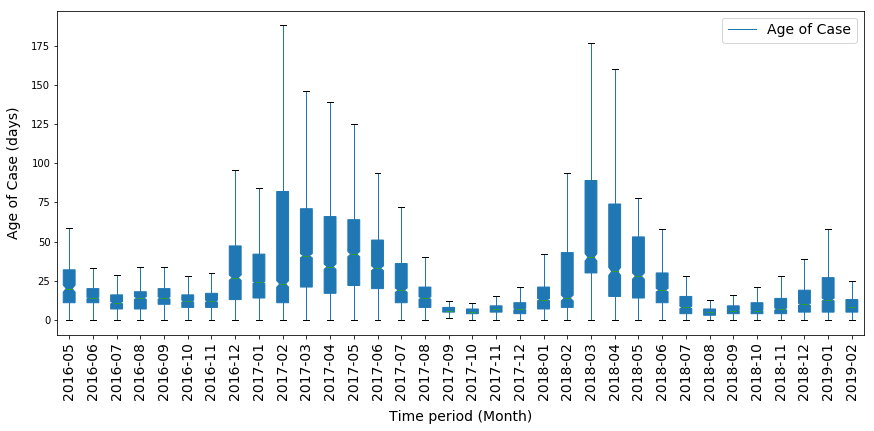

In [27]:
# Boxplot Age of Case by Month to higlight outliers and justify median vs. mean analysis
# district_labels =["District 1","District 2","District 3","District 4","District 5","District 6","District 7","District 8","District 9"]
# fig = plt.subplots(figsize=(14,6))
age = ["Age of Case"]
month_labels = np.array(pothole_reports_AOC['Month'])
pothole_df.boxplot(column="case_age_days", by="Month", notch=True, vert=True, showfliers=False, widths=.5, figsize=(14,6), grid=False, patch_artist=True)
colors = ["lightseagreen"]
# plt.yticks(1,range(1,len(district_labels)+1), district_labels, fontsize=14)
plt.xticks(range(1,len(pothole_reports_AOC['Month'])+1), month_labels, fontsize=14, rotation=90)
# plt.title("Age of Case by Month", fontsize=16, pad=15)
plt.title("", fontsize=18, pad=15)
plt.ylabel("Age of Case (days)", fontsize=14, labelpad=10)
plt.xlabel("Time period (Month)", fontsize=14, labelpad=10)
plt.legend(age, fontsize=14)
plt.suptitle("")
plt.savefig('images/age_of_case_boxplot.png', bbox_inches='tight', pad_inches=0.39)

Text(0, 0.5, 'Median Age of Case (days)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 34 artists>

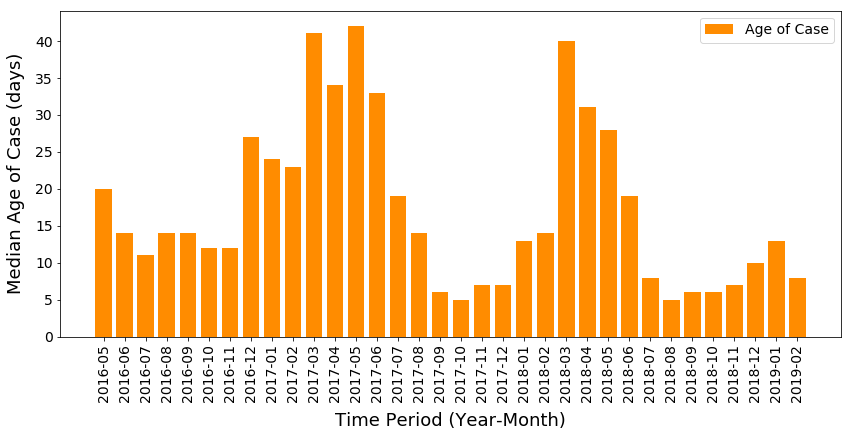

In [11]:
# Plot Median Age of Case (AOC) by Month
fig = plt.subplots(figsize=(14,6))
legend_handle = "Service Requests Count"
x_aoc = pothole_reports_AOC['Month']
y_aoc = pothole_reports_AOC['Median Age of Case']
# plt.title("Median Age of Case by Month (May 2016 - Feb 2019)", fontsize=16, pad=15)
plt.ylabel("Median Age of Case (days)", fontsize=18, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=18, labelpad=10)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x_aoc,y_aoc, color="darkorange")
plt.legend(age, fontsize=14)
plt.savefig('images/age_of_case_May2016Feb2019.png', bbox_inches='tight', pad_inches=0.39)

In [12]:
# Age of Case = AOC [MEDIAN] - Time period 2017 grouped-by month
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports_AOC_2017 = pd.DataFrame(pothole_df.groupby('Month')['case_age_days'].median())
pothole_reports_AOC_2017 = pothole_reports_AOC_2017.loc['2017-01':'2017-12']
pothole_reports_AOC_2017.rename(columns={'case_age_days':'Median Age of Case'}, inplace=True)
pothole_reports_AOC_2017.head(5)
pothole_reports_AOC_2017.reset_index(inplace=True)

,Median Age of Case
Month,
2017-01,24.0
2017-02,23.0
2017-03,41.0
2017-04,34.0
2017-05,42.0


Text(0.5, 1.0, '2017 Median Age of Case by Month')

Text(0, 0.5, 'Median Age of Case (days)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

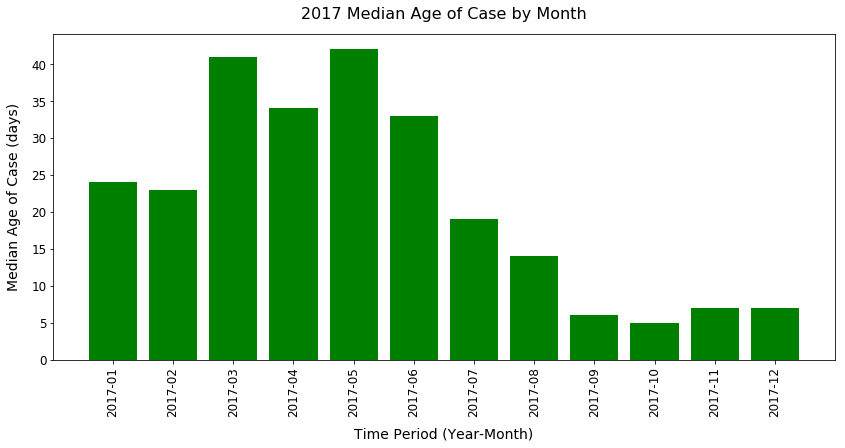

In [13]:
# Plot Median Age of Case (AOC) by Month
fig = plt.subplots(figsize=(14,6))
x17_aoc = pothole_reports_AOC_2017['Month']
y17_aoc = pothole_reports_AOC_2017['Median Age of Case']
plt.title("2017 Median Age of Case by Month", fontsize=16, pad=15)
plt.ylabel("Median Age of Case (days)", fontsize=14, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=14, labelpad=10)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x17_aoc,y17_aoc, color="green")
plt.savefig('images/age_of_case_2017.png', bbox_inches='tight', pad_inches=0.39)

In [14]:
# Age of Case = AOC [MEDIAN] - Time period 2018 grouped-by month
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports_AOC_2018 = pd.DataFrame(pothole_df.groupby('Month')['case_age_days'].median())
pothole_reports_AOC_2018 = pothole_reports_AOC_2018.loc['2018-01':'2018-12']
pothole_reports_AOC_2018.rename(columns={'case_age_days':'Median Age of Case'}, inplace=True)
pothole_reports_AOC_2018.head(5)
pothole_reports_AOC_2018.reset_index(inplace=True)

,Median Age of Case
Month,
2018-01,13.0
2018-02,14.0
2018-03,40.0
2018-04,31.0
2018-05,28.0


In [15]:
# # Boxplot Median Age of Case by Month to justify median vs. mean analysis
# district_labels =["District 1","District 2","District 3","District 4","District 5","District 6","District 7","District 8","District 9"]
# pothole_reports_AOC_box_df = pd.DataFrame(pothole_df.groupby('Month')['case_age_days'])
# pothole_reports_AOC_box_df.reset_index(inplace=True)
# pothole_reports_AOC_box_df
# # pothole_reports_AOC_box_df.boxplot(column="case_age_days", by="Month", vert=False)
# plt.yticks(range(1,len(district_labels)+1), district_labels, fontsize=12)
# # plt.title("Age of Case by Council District", fontsize=16, pad=15)
# plt.title("", fontsize=16, pad=15)
# plt.ylabel("Council District", fontsize=14, labelpad=10)
# plt.xlabel("Age of Case (days)", fontsize=14, labelpad=10)
# plt.suptitle("")
# # plt.savefig('images/age_of_case_boxplot.png', bbox_inches='tight', pad_inches=0.39)

Text(0.5, 1.0, '2018 Median Age of Case by Month')

Text(0, 0.5, 'Median Age of Case (days)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

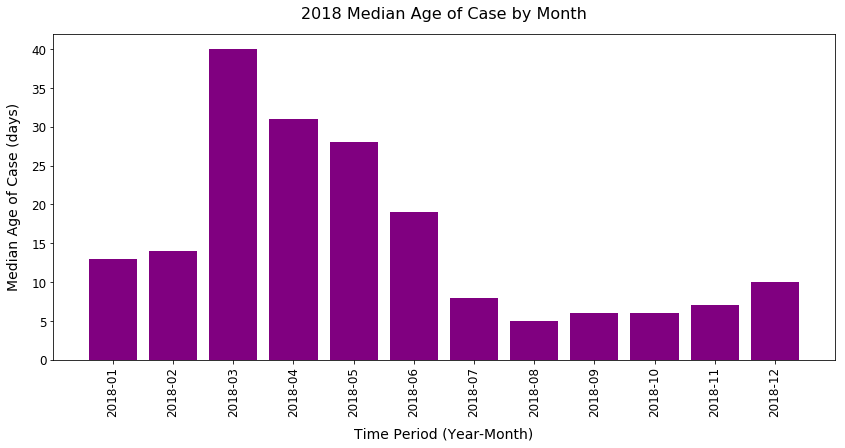

In [16]:
# Plot Median Age of Case (AOC) by Month
fig = plt.subplots(figsize=(14,6))
x18_aoc = pothole_reports_AOC_2018['Month']
y18_aoc = pothole_reports_AOC_2018['Median Age of Case']
plt.title("2018 Median Age of Case by Month", fontsize=16, pad=15)
plt.ylabel("Median Age of Case (days)", fontsize=14, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=14, labelpad=10)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x18_aoc,y18_aoc, color="purple")
plt.savefig('images/age_of_case_2018.png', bbox_inches='tight', pad_inches=0.39)

Text(0, 0.5, 'Median Age of Case (days)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

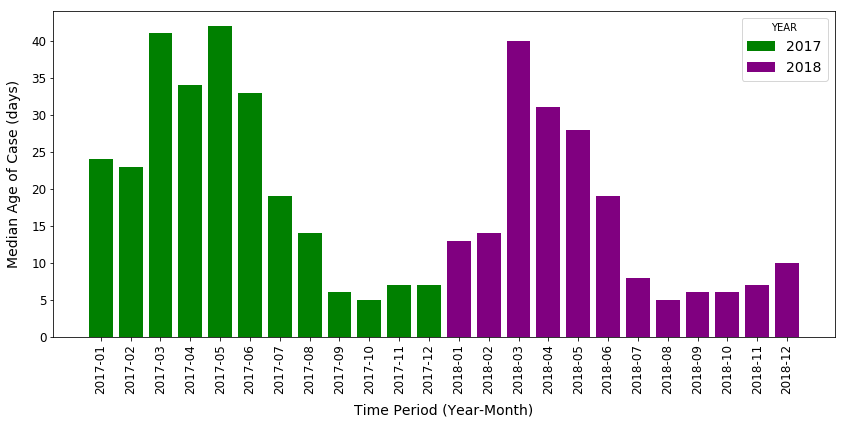

In [17]:
# Plot Median Age of Case (AOC) by Month
fig = plt.subplots(figsize=(14,6))
# plt.title("Median Age of Case by Month (2017-2018)", fontsize=16, pad=15)
year = ['2017','2018']
plt.ylabel("Median Age of Case (days)", fontsize=14, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=14, labelpad=10)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x17_aoc,y17_aoc, color="green")
plt.bar(x18_aoc,y18_aoc, color="purple")
plt.legend(year, title="YEAR", fontsize=14)
plt.savefig('images/age_of_case_20172018.png', bbox_inches='tight', pad_inches=0.39)

Text(0, 0.5, 'Median Age of Case (days)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

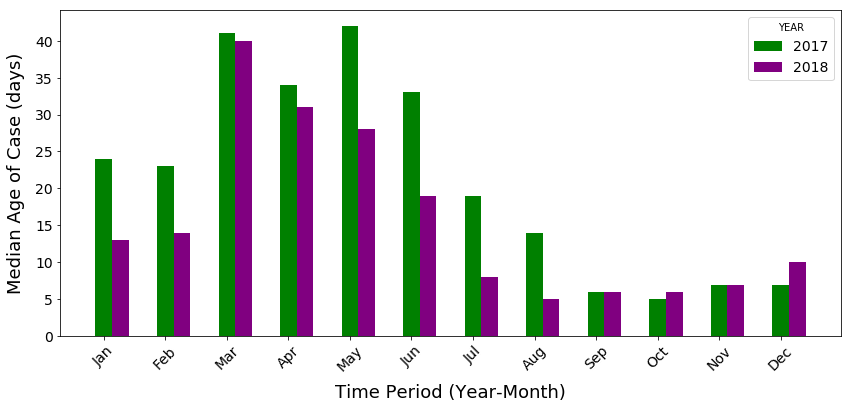

In [18]:
# Plot Median Age of Case (AOC) by Month multi-year
months = 12
mon = np.arange(months)  # the x locations for the month groups
width = 0.27
month_labels =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
year = ['2017','2018']
fig = plt.subplots(figsize=(14,6))
# plt.title("Median Age of Case: Month-over-Month (2017-2018)", fontsize=16, pad=15)
plt.ylabel("Median Age of Case (days)", fontsize=18, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=18, labelpad=10)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.bar(mon+width,y17_aoc, width, color="green", tick_label=month_labels)
plt.bar(mon+width*2,y18_aoc, width, color="purple")
plt.legend(year, title="YEAR", fontsize=14)
plt.savefig('images/age_of_case_month.png', bbox_inches='tight', pad_inches=0.39)

### Number of Service Requests by Month

In [19]:
# Number of Service Requests by Month
# get substring YYYY-MM
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports_cnt = pd.DataFrame(pothole_df.groupby('Month')['Month'].count())
# Time Period Jan 2017 to Dec 2018
pothole_reports_cnt = pothole_reports_cnt.loc['2017-01':'2017-12']
pothole_reports_cnt.rename(columns={'Month':'2017 Service Requests'}, inplace=True)
pothole_reports_cnt.head(12)
pothole_reports_cnt.reset_index(inplace=True)

,2017 Service Requests
Month,
2017-01,6070
2017-02,3016
2017-03,3510
2017-04,2098
2017-05,1697
2017-06,1159
2017-07,915
2017-08,753
2017-09,587


In [20]:
# Time Period 2017
pothole_reports_cnt = pd.DataFrame(pothole_df.groupby('Month')['Month'].count())
pothole_reports_cnt_2017 = pothole_reports_cnt.loc['2017-01':'2017-12']
pothole_reports_cnt_2017.rename(columns={'Month':'Service Requests'}, inplace=True)
pothole_reports_cnt_2017.head(12)
pothole_reports_cnt_2017.reset_index(inplace=True)

/Users/jamesmcarter/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Service Requests
Month,
2017-01,6070
2017-02,3016
2017-03,3510
2017-04,2098
2017-05,1697
2017-06,1159
2017-07,915
2017-08,753
2017-09,587


In [21]:
# Time Period 2018
pothole_reports_cnt = pd.DataFrame(pothole_df.groupby('Month')['Month'].count())
pothole_reports_cnt_2018 = pothole_reports_cnt.loc['2018-01':'2018-12']
pothole_reports_cnt_2018.rename(columns={'Month':'Service Requests'}, inplace=True)
pothole_reports_cnt_2018.head(12)
pothole_reports_cnt_2018.reset_index(inplace=True)

,Service Requests
Month,
2018-01,1084
2018-02,911
2018-03,1535
2018-04,1359
2018-05,1009
2018-06,778
2018-07,647
2018-08,668
2018-09,654


Text(0.5, 1.0, 'Number of Service Requests by Month (2017-2018)')

Text(0, 0.5, 'Service Requests (Count)')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

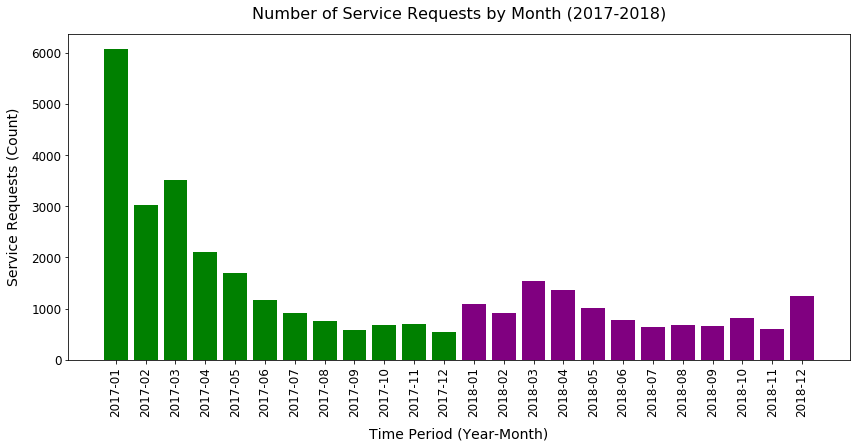

In [22]:
# Number of Service Requests by Month
fig = plt.subplots(figsize=(14,6))
x17_cnt = pothole_reports_cnt_2017['Month']
y17_cnt = pothole_reports_cnt_2017['Service Requests']
x18_cnt = pothole_reports_cnt_2018['Month']
y18_cnt = pothole_reports_cnt_2018['Service Requests']

plt.title("Number of Service Requests by Month (2017-2018)", fontsize=16, pad=15)
plt.ylabel("Service Requests (Count)", fontsize=14, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=14, labelpad=10)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x17_cnt,y17_cnt, color="green")
plt.bar(x18_cnt,y18_cnt, color="purple")
plt.savefig('images/service_request_20172018.png', bbox_inches='tight', pad_inches=0.39)

Text(0.5, 1.0, 'Service Requests by Month-over-Month (2017-2018)')

Text(0, 0.5, 'Service Requests (Count))')

Text(0.5, 0, 'Time Period (Year-Month)')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

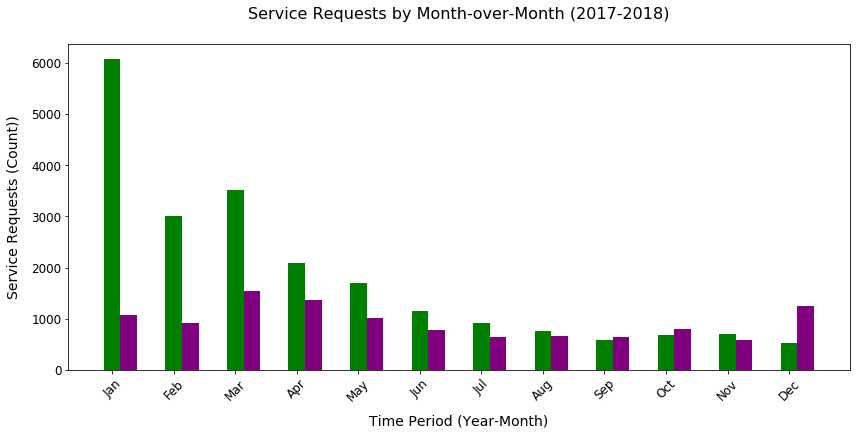

In [23]:
# Plot Service Requests by Month multi-year
months = 12
mon = np.arange(months)  # the x locations for the month groups
width = 0.27
month_labels =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig = plt.subplots(figsize=(14,6))
plt.title("Service Requests by Month-over-Month (2017-2018)", fontsize=16, pad=25)
plt.ylabel("Service Requests (Count))", fontsize=14, labelpad=10)
plt.xlabel("Time Period (Year-Month)", fontsize=14, labelpad=10)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.bar(mon+width,y17_cnt, width, color="green", tick_label=month_labels)
plt.bar(mon+width*2,y18_cnt, width, color="purple")
plt.savefig('images/service_request_month.png', bbox_inches='tight', pad_inches=0.39)

### Age of Case by Council District

In [24]:
# get substring YYYY-MM
pothole_reports_CD = pothole_df[["case_age_days","district"]]
pothole_reports_CD = pd.DataFrame(pothole_df.groupby('district')['case_age_days'].median())
pothole_reports_CD.rename(columns={'case_age_days':'Median Age of Case'}, inplace=True)
pothole_reports_CD = pothole_reports_CD.iloc[:,:]
pothole_reports_CD.head(10)
pothole_reports_CD.reset_index(inplace=True)

,Median Age of Case
district,
1.0,17.0
2.0,18.0
3.0,15.0
4.0,11.0
5.0,14.0
6.0,21.0
7.0,20.0
8.0,14.0
9.0,14.0


([<matplotlib.axis.YTick at 0x12284d860>,
 <a list of 9 Text yticklabel objects>)

Text(0.5, 1.0, 'Age of Case by Council District')

Text(0, 0.5, 'Council District')

Text(0.5, 0, 'Age of Case (days)')

Text(0.5, 0.98, '')

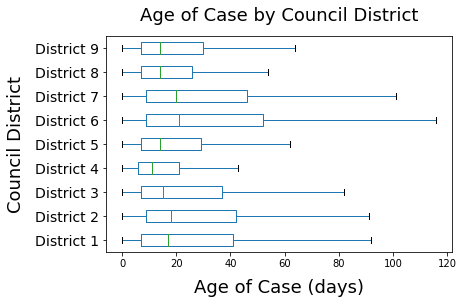

In [25]:
# Boxplot Age of Case by Council District to justify median vs. mean analysis
district_labels =["District 1","District 2","District 3","District 4","District 5","District 6","District 7","District 8","District 9"]
pothole_reports_CD_box = pothole_df[["case_age_days","district"]]
pothole_reports_CD_box.boxplot(column="case_age_days", by="district", vert=False, showfliers=False, grid=False)
plt.yticks(range(1,len(district_labels)+1), district_labels, fontsize=14)
plt.title("Age of Case by Council District", fontsize=18, pad=15)
plt.ylabel("Council District", fontsize=18, labelpad=10)
plt.xlabel("Age of Case (days)", fontsize=18, labelpad=10)
plt.suptitle("")
plt.savefig('images/age_of_case_boxplot.png', bbox_inches='tight', pad_inches=0.39)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Median Age of Case by Council District')

Text(0, 0.5, 'Council District')

Text(0.5, 0, 'Median Age of Case (days)')

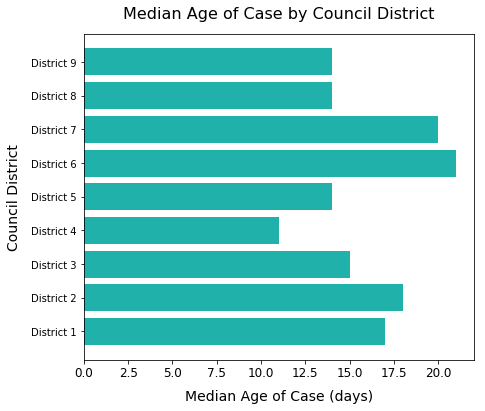

In [26]:
# Bar plot Age of Case by Council District
council_districts = 9
district = np.arange(months)  # the x locations for the month groups
width = 0.27

fig = plt.subplots(figsize=(7,6))
x_cd = pothole_reports_CD['district']
y_cd = pothole_reports_CD['Median Age of Case']

plt.xticks(fontsize=12)
plt.barh(x_cd,y_cd, color="lightseagreen", tick_label=district_labels)
plt.title("Median Age of Case by Council District", fontsize=16, pad=15)
plt.ylabel("Council District", fontsize=14, labelpad=10)
plt.xlabel("Median Age of Case (days)", fontsize=14, labelpad=10)
plt.show()